## Estadística Aplicada

Sesión 7 - 5 septiembre

Alexandra Guadalupe Valdez Mireles 

1910361

Gpo 44

In [1]:
## Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
pip install lifelines

     ---------------------------------------- 0.0/409.4 kB ? eta -:--:--
     ------------- ------------------------ 143.4/409.4 kB 2.8 MB/s eta 0:00:01
     ---------------------------------- --- 368.6/409.4 kB 3.8 MB/s eta 0:00:01
     -------------------------------------  399.4/409.4 kB 4.1 MB/s eta 0:00:01
     -------------------------------------  399.4/409.4 kB 4.1 MB/s eta 0:00:01
     -------------------------------------  399.4/409.4 kB 4.1 MB/s eta 0:00:01
     -------------------------------------- 409.4/409.4 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
     --------------------------------- ------ 41.0/49.3 kB ? eta -:--:--
     --------------------------------- ------ 41.0/49.3 kB ? eta -:--:--
     --------------------------------- ------ 41.0/49.3 kB ? eta -:--:--
     -------------------------------------- 49.3/49.3 kB 226.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/88.9 kB ? eta -:--:--
    

  DEPRECATION: future is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: autograd-gamma is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\FCFM\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Librería Especializada
from lifelines import ExponentialFitter

In [4]:
## Datos
datos_exp = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [5]:
datos_exp

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [7]:
# Estimar un modelo de supervivencia exponencial
exp = ExponentialFitter().fit(datos_exp[' tiempo'],datos_exp[' estado'])

In [49]:
exp.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

In [8]:
## a) Riesgo de recaer
exp.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [9]:
## b) Probabilidad de recaer en el mes 16 -> S(16)
exp.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

In [10]:
exp.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,10,10
5.0,1,1,0,0,10
8.0,1,1,0,0,9
12.0,1,1,0,0,8
16.0,1,0,1,0,7
17.0,2,1,1,0,6
19.0,1,0,1,0,4
24.0,1,1,0,0,3
30.0,1,0,1,0,2


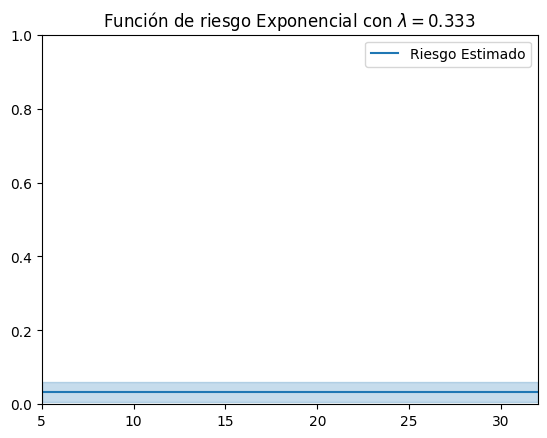

In [28]:
exp.plot_hazard(label='Riesgo Estimado')
plt.title( 'Función de riesgo Exponencial con $\lambda=0.333$')
plt.xlim(5,32)
plt.ylim(0,1);

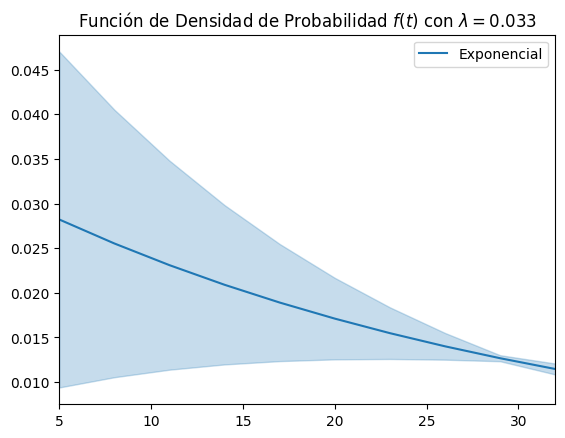

In [33]:
# f(t)
exp.plot_density(label='Exponencial')
plt.title('Función de Densidad de Probabilidad $f(t)$ con $\lambda=0.033$')
plt.xlim(5,32);

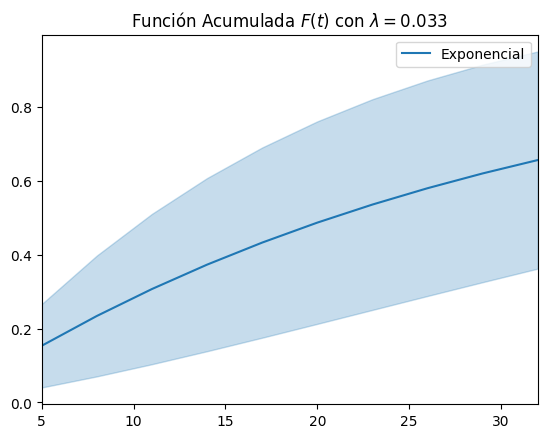

In [35]:
# acumulada
exp.plot_cumulative_density(label='Exponencial')
plt.title('Función Acumulada $F(t)$ con $\lambda=0.033$')
plt.xlim(5,32);

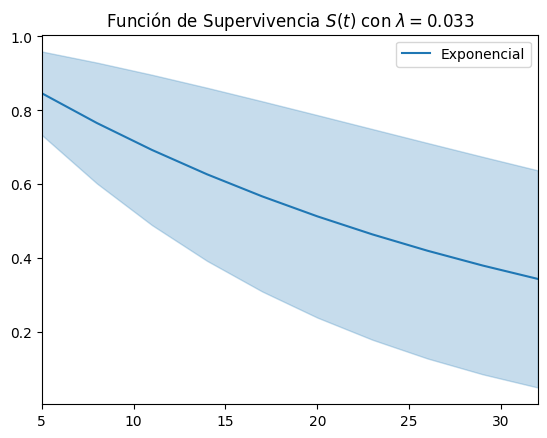

In [34]:
# S(t)
exp.plot_survival_function(label='Exponencial')
plt.title('Función de Supervivencia $S(t)$ con $\lambda=0.033$')
plt.xlim(5,32);

In [39]:
from lifelines import WeibullFitter

Los datos se comportan como una función de densidad de probabilidad Weibull

In [40]:
mweibull = WeibullFitter().fit(datos_exp[' tiempo'], datos_exp[' estado'])

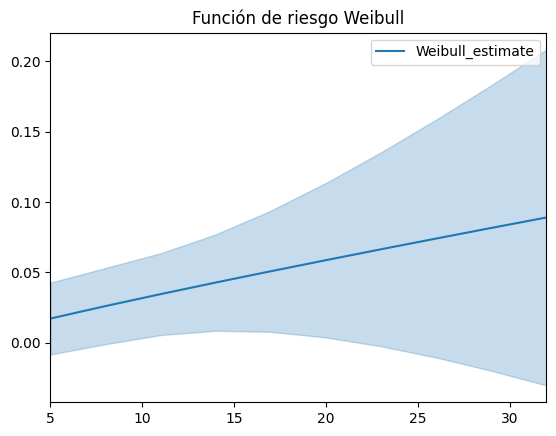

In [42]:
mweibull.plot_hazard()
plt.title( 'Función de riesgo Weibull')
plt.xlim(5,32);

In [43]:
## gamma = rho_
mweibull.rho_

1.8867259500116444

In [44]:
from lifelines import LogNormalFitter

In [45]:
mlogn = LogNormalFitter().fit(datos_exp[' tiempo'], datos_exp[' estado'])

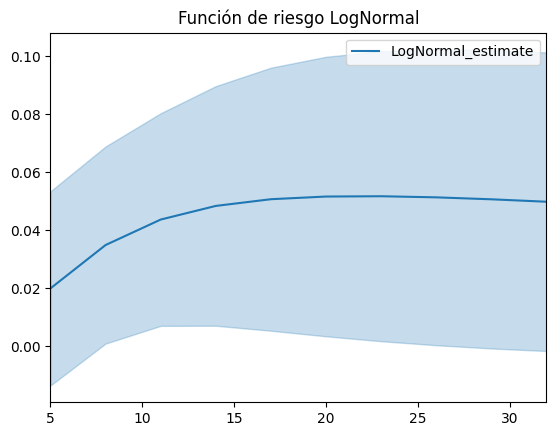

In [47]:
mlogn.plot_hazard()
plt.title( 'Función de riesgo LogNormal')
plt.xlim(5,32);

In [48]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


In [53]:
# 
print('Exponencial:', exp.AIC_.round(2), 'Weibull:', mweibull.AIC_.round(2), 'LogNormal:' , mlogn.AIC_.round(2))

Exponencial: 54.81 Weibull: 54.16 LogNormal: 54.51


El tiempo de recaída de esta enfermedad se ajusta mejor a un modelo Weibull, donde conforme el tiempo avanza se incrementa el riesgo de recaer.